# **Data Analysis**

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

### **1. Load the Raw Data**

In [2]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving newmoviedata.txt to newmoviedata (3).txt


### **2. Read and Parse the Data**

The data is contained in a google doc in txt format. We therefore need to transform the raw data into a structured format that is suitable for analysis and algorithm development. Read the data from the text file and parse it into a more structured format using Pandas

In [3]:
file_path = 'newmoviedata.txt'

Define column names

In [4]:
columns = ['User', 'Movie', 'Rating']

Read data into a DataFrame

In [5]:
data = pd.read_csv(file_path, names=columns)

Display the first few rows to verify the data is loaded correctly

In [6]:
print(data.head())

    User          Movie Rating
0  Alice      Star Wars      5
1  Frank  The Godfather      4
2    Bob        Titanic      5
3  Carol     The Matrix      3
4   Dave      Inception      2


### **3. Clean The Data**

**Convert Data Types**

Ensure that the 'Rating' column is of the appropriate numeric data type.Convert non-numeric values to NaN

In [7]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

**Handling Missing Values**

Fill NaN values with a specific default value, in this case we will use the mean rating.

In [8]:
data['Rating'].fillna(data['Rating'].mean(), inplace=True)

In [9]:
# Verify the changes
print(data['Rating'])

0     5.00
1     4.00
2     5.00
3     3.00
4     2.00
5     4.00
6     5.00
7     2.00
8     3.00
9     4.00
10    4.00
11    5.00
12    4.00
13    5.00
14    3.00
15    5.00
16    4.00
17    5.00
18    3.00
19    4.00
20    4.00
21    1.00
22    4.00
23    5.00
24    3.00
25    5.00
26    3.00
27    3.00
28    4.00
29    5.00
30    5.00
31    4.00
32    3.89
33    3.89
34    5.00
35    2.00
36    4.00
37    4.00
38    2.00
39    4.00
40    3.89
41    3.89
42    4.00
43    3.50
44    5.00
45    3.89
46    3.50
47    5.00
48    3.89
49    3.50
50    3.89
51    3.89
52    4.00
53    5.00
54    3.00
55    3.00
56    5.00
57    4.00
Name: Rating, dtype: float64


### **4. Exploratory Data Analysis (EDA)**

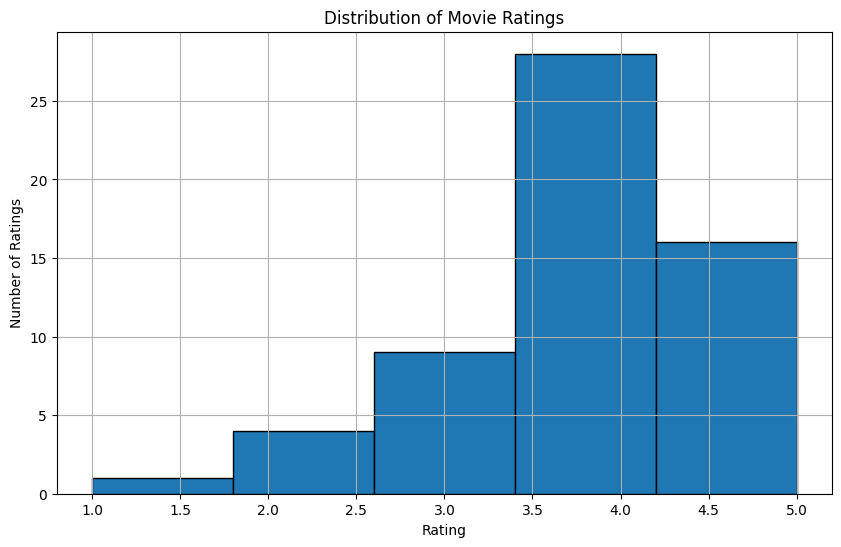

In [10]:
# Explore the distribution of movie ratings
plt.figure(figsize=(10, 6))
data['Rating'].hist(bins=5, edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

In [11]:
# Identify popular movies
popular_movies = data['Movie'].value_counts().head(10)
print("\nTop 10 Popular Movies:")
print(popular_movies)


Top 10 Popular Movies:
Inception        11
Star Wars         9
Forrest Gump      9
The Matrix        8
Pulp Fiction      8
The Godfather     7
Titanic           5
Matrix            1
Name: Movie, dtype: int64


In [12]:
# Calculate average ratings for each movie
average_ratings = data.groupby('Movie')['Rating'].mean().sort_values(ascending=False)
print("\nAverage Ratings for Each Movie:")
print(average_ratings.head(10))


Average Ratings for Each Movie:
Movie
The Godfather    4.412857
Titanic          4.400000
Star Wars        4.308889
Forrest Gump     3.944444
Matrix           3.890000
Pulp Fiction     3.673750
The Matrix       3.673750
Inception        3.252727
Name: Rating, dtype: float64


In [13]:
# Analyze user behavior - How often users rate movies
user_rating_counts = data['User'].value_counts()
average_ratings_per_user = user_rating_counts.mean()
print("\nAverage Ratings Given by Each User:")
print(average_ratings_per_user)


Average Ratings Given by Each User:
2.6363636363636362


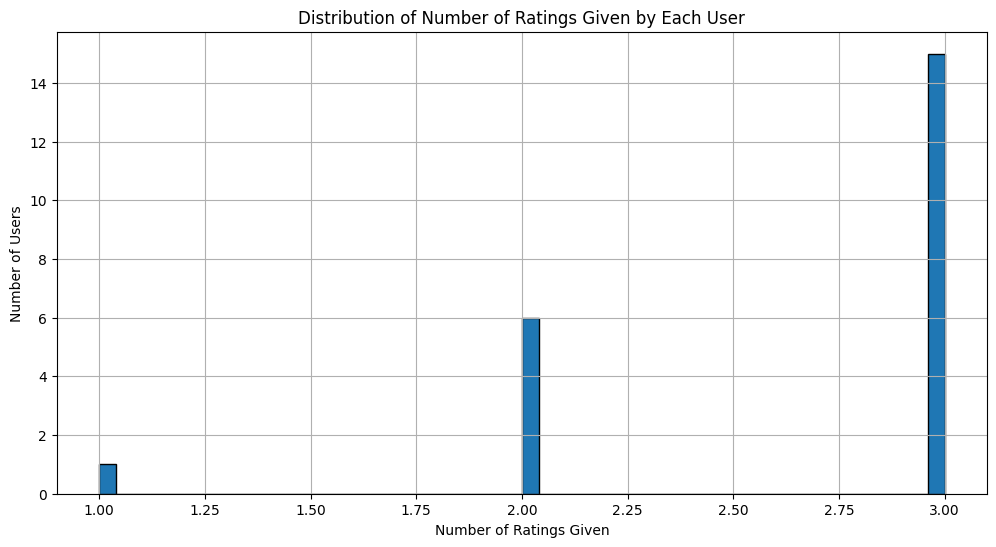

In [14]:
# Distribution of the number of ratings given by each user
plt.figure(figsize=(12, 6))
user_rating_counts.hist(bins=50, edgecolor='black')
plt.title('Distribution of Number of Ratings Given by Each User')
plt.xlabel('Number of Ratings Given')
plt.ylabel('Number of Users')
plt.show()

# **Algorithm Development**

###**1. User-Item Collaborative Filtering**

In [15]:
# Develop a movie recommendation algorithm based on user ratings
def collaborative_filtering_recommendation(user_name, user_item_matrix, movie_similarity_matrix):
    # Get the user's ratings
    user_ratings = user_item_matrix.loc[user_name]

    # Calculate the weighted average of ratings based on movie similarity
    recommendation_scores = user_item_matrix.dot(movie_similarity_matrix)
    recommendation_scores = recommendation_scores.div(np.abs(movie_similarity_matrix).sum(axis=1))

    # Exclude movies the user has already rated
    rated_movies = user_ratings[user_ratings.notnull()].index
    recommendation_scores = recommendation_scores.drop(rated_movies, axis=1)

    # Sort recommendations by score in descending order
    recommendations = recommendation_scores.loc[user_name].sort_values(ascending=False)

    return recommendations

###**2. Data Handling**

In [16]:
# Implement robust measures to handle irregular or incomplete data
def handle_missing_values(data):
    #Ensure that the 'Rating' column is of the appropriate numeric data type.Convert non-numeric values to NaN
    data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
    # Fill missing values with the mean rating
    data['Rating'].fillna(data['Rating'].mean(), inplace=True)

###**3. Fallback System**

In [17]:
# Create a fallback system that recommends popular movies if a user's data doesn't provide enough information
def fallback_recommendation(user_name, popular_movies):
    return popular_movies

###**4. Implementation on our Sample Data**

In [18]:
# Create user-item matrix
user_item_matrix = data.pivot_table(index='User', columns='Movie', values='Rating', fill_value=0)

In [19]:
# Calculate movie similarity using cosine similarity
movie_similarity_matrix = pd.DataFrame(cosine_similarity(user_item_matrix.T), index=user_item_matrix.columns, columns=user_item_matrix.columns)

In [20]:
# Example: Collaborative filtering recommendation
user_name = 'Alice'
recommendations = collaborative_filtering_recommendation(user_name, user_item_matrix, movie_similarity_matrix)

In [21]:
# Display top 5 recommendations
print(f"\nCollaborative Filtering Recommendations for {user_name}:")
print(recommendations.head(5))


Collaborative Filtering Recommendations for Alice:
Series([], Name: Alice, dtype: float64)


In [22]:
# Example: Fallback recommendation
popular_movies = data.groupby('Movie')['Rating'].count().sort_values(ascending=False).index
fallback_recommendations = fallback_recommendation(user_name, popular_movies)

In [23]:
# Display top 5 fallback recommendations
print(f"\nFallback Recommendations for {user_name}:")
print(fallback_recommendations[:5])


Fallback Recommendations for Alice:
Index(['Inception', 'Forrest Gump', 'Star Wars', 'Pulp Fiction', 'The Matrix'], dtype='object', name='Movie')


# **User Interface Design**

In [24]:
# CLI Implementation
def main():
    # Load data and handle missing values
    data = pd.read_csv(file_path, names=columns)
    handle_missing_values(data)

    # Create user-item matrix
    user_item_matrix = data.pivot_table(index='User', columns='Movie', values='Rating', fill_value=0)

    # Calculate movie similarity using cosine similarity
    movie_similarity_matrix = pd.DataFrame(cosine_similarity(user_item_matrix.T), index=user_item_matrix.columns, columns=user_item_matrix.columns)

    # Get user input
    user_name = input("Enter your name: ")

    # Collaborative filtering recommendation
    recommendations = collaborative_filtering_recommendation(user_name, user_item_matrix, movie_similarity_matrix)

    if recommendations.empty:
        # Fallback recommendation
        popular_movies = data.groupby('Movie')['Rating'].count().sort_values(ascending=False).index
        fallback_recommendations = fallback_recommendation(user_name, popular_movies)
        print(f"\nFallback Recommendations for {user_name}:")
        print(fallback_recommendations[:5])
    else:
        # Display top 5 collaborative filtering recommendations
        print(f"\nCollaborative Filtering Recommendations for {user_name}:")
        print(recommendations.head(5))

if __name__ == "__main__":
    main()

Enter your name: Frank

Fallback Recommendations for Frank:
Index(['Inception', 'Forrest Gump', 'Star Wars', 'Pulp Fiction', 'The Matrix'], dtype='object', name='Movie')
